In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(config['data'])
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [5]:
print(f"Df shape: {df.shape}")

Df shape: (187531, 21)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [7]:
# Drop 'Index' column
df.drop(['Index'], inplace=True, axis=1)
df.head()
dtypes = df.dtypes
cols = df.columns
cat_cols = cols[dtypes == 'object'].values.tolist()
num_cols = cols[dtypes != 'object'].values.tolist()

#**Statistical information of categorical features**

In [8]:
df[cat_cols].describe()

,Title,Description,Amount(in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
count,187531,184508,187531,187531,106858,186916,180454,187448,184634,117298,106095,77853,186703,138596,84174,122014,79846
unique,32446,65634,1561,81,2758,1,947,4,3,8,19,10376,11,11,229,4,2976
top,2 BHK Ready to Occupy Flat for sale in Divyasr...,Multistorey apartment is available for sale. I...,Call for Price,new-delhi,1000 sqft,Ready to Move,2 out of 4,Resale,Semi-Furnished,East,Main Road,Hamdam Apartment,2,2,1 Covered,Freehold,1100 sqft
freq,2106,2732,9684,27599,5285,186916,12433,144172,88318,54741,32193,1648,93007,51809,38754,112229,2599


#**Statistical information of numerical features**

In [9]:
df[num_cols].describe()

,Price (in rupees),Dimensions,Plot Area
count,1.698660e+05,0.0,0.0
mean,7.583772e+03,NaN,NaN
std,2.724171e+04,NaN,NaN
min,0.000000e+00,NaN,NaN
25%,4.297000e+03,NaN,NaN
50%,6.034000e+03,NaN,NaN
75%,9.450000e+03,NaN,NaN
max,6.700000e+06,NaN,NaN


In [10]:
df_shape = df.shape

def count_missings(df):
  df_shape = df.shape
  cols = df.columns
  missings = {}

  for col in cols:
    missing_count = df[col].isna().sum()
    missings[col] = missing_count
  missings = {k: v for k, v in sorted(missings.items(), key = lambda item: item[1], reverse=True)}
  for i in range(len(cols)):
    col_name = list(missings.keys())[i]
    missing_count = missings[col_name]
    print(f'{col_name} missings: {missing_count}, rate: {missing_count / df_shape[0]:.2f}')
  return missings

def find_missing_percent(df):
  miss_df = pd.DataFrame({"ColumnName" : [], "TotalMissingVals" : [], "PercentMissing" : []})
  nrows = df.shape[0]
  for col in df.columns:
    num_of_missing = df[col].isnull().sum()
    if(num_of_missing > 0):
      missing_info = {"ColumnName" : [col], "TotalMissingVals" : num_of_missing, "PercentMissing" : num_of_missing/nrows * 100}
      miss_df = pd.concat([miss_df, pd.DataFrame.from_dict(missing_info)], ignore_index= True)
  return miss_df
# missings = count_missings(df)

missing_df = find_missing_percent(df)

#**Take a look at missing values**

,ColumnName,TotalMissingVals,PercentMissing
16,Plot Area,187531.0,100.000000
15,Dimensions,187531.0,100.000000
9,Society,109678.0,58.485264
14,Super Area,107685.0,57.422506
12,Car Parking,103357.0,55.114621
8,overlooking,81436.0,43.425354
2,Carpet Area,80673.0,43.018488
7,facing,70233.0,37.451408
13,Ownership,65517.0,34.936624
11,Balcony,48935.0,26.094352


<Axes: >

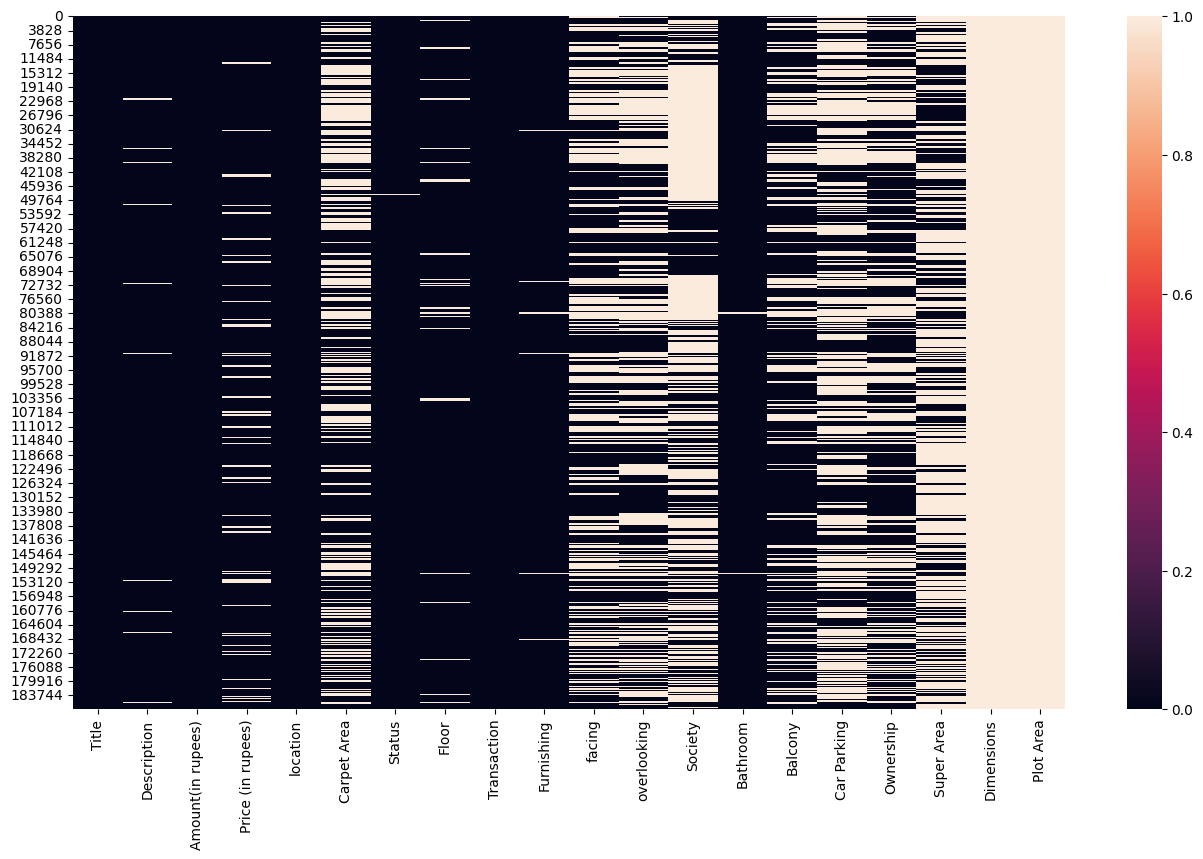

In [11]:
display(missing_df.sort_values(by="PercentMissing", axis=0, ascending=False))
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

#**Remove attributes with high missing rates**

In [12]:
missing_percent_threshold = 50
remove_cols = list(missing_df[missing_df["PercentMissing"] > missing_percent_threshold]["ColumnName"])
cleaned_df = df.drop(remove_cols, axis=1)

<Axes: >

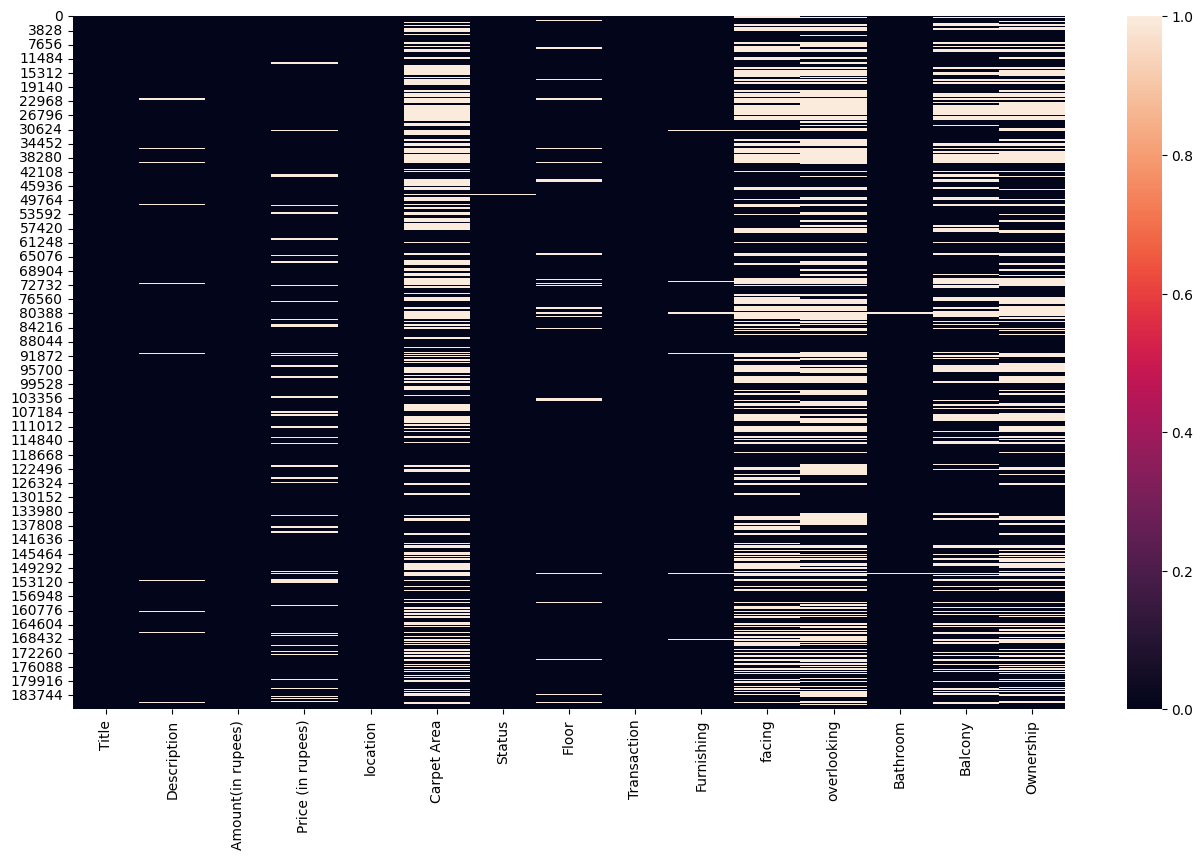

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(cleaned_df.isnull())

In [14]:
cleaned_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,1,2,NaN
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,NaN,Freehold
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,NaN,Freehold
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,NaN,Co-operative Society


In [15]:
print(f"Cleaned df shape: {cleaned_df.shape}")

Cleaned df shape: (187531, 15)


#**Exploratory data analysis**

In [16]:
def get_col_details(df):
  cols = df.columns
  dtypes = df.dtypes
  cat_cols = cols[dtypes == 'object'].values.tolist()
  num_cols = cols[dtypes != 'object'].values.tolist()
  return cols, cat_cols, num_cols

cleaned_cols, cleaned_cat_cols, cleaned_num_cols = get_col_details(cleaned_df)

In [17]:
cleaned_cat_cols

['Title',
 'Description',
 'Amount(in rupees)',
 'location',
 'Carpet Area',
 'Status',
 'Floor',
 'Transaction',
 'Furnishing',
 'facing',
 'overlooking',
 'Bathroom',
 'Balcony',
 'Ownership']

In [18]:
cleaned_num_cols

['Price (in rupees)']

<Axes: ylabel='Density'>

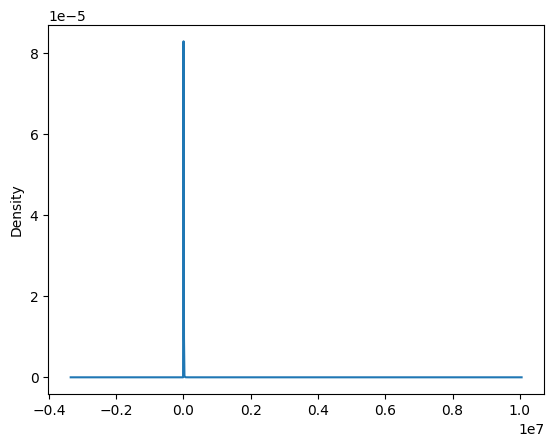

In [19]:
cleaned_df['Price (in rupees)'].plot(kind='kde')

## "" Title ""

In [20]:
cleaned_df["Title"].value_counts()

Title
2 BHK Ready to Occupy Flat for sale in Divyasree Elan Sarjapur Road                   2106
4 BHK Ready to Occupy Flat for sale in Hamdam Apartment Dwarka Sector 18              1647
2 BHK Ready to Occupy Flat for sale Nayabad                                           1295
3 BHK Ready to Occupy Flat for sale in Shree Vardhman Victoria Sector 70              1147
3 BHK Ready to Occupy Flat for sale Jagatpur                                           986
                                                                                      ... 
3 BHK Ready to Occupy Flat for sale in Planner N Maker Homes Uttam Nagar West            1
3 BHK Ready to Occupy Flat for sale Rohini Sector 8                                      1
3 BHK Ready to Occupy Flat for sale in IFS Apartments Acharya Niketan, Mayur Vihar       1
2 BHK Ready to Occupy Flat for sale in Joshi Lane Karol Bagh                             1
2 BHK Ready to Occupy Flat for sale in Friends Enclave Kishanpura                   

In [21]:
import re
final_df = cleaned_df.copy()
final_df["Bedroom, Hall and Kitchen"] = cleaned_df["Title"].apply(lambda x: re.search(r'^\d+\sBHK', str(x)).group().split('BHK')[0] if re.search(r'^\d+\sBHK', str(x)) else np.nan)

## "" Amount(in rupees) ""

In [22]:
cleaned_df['Amount(in rupees)'].value_counts()

Amount(in rupees)
Call for Price    9684
85 Lac            5264
65 Lac            4229
60 Lac            3869
70 Lac            3801
                  ... 
21.60 Cr             1
21.45 Cr             1
9.45 Cr              1
13.6 Lac             1
9.90 Cr              1
Name: count, Length: 1561, dtype: int64

In [23]:
cleaned_df['Amount curr'] = cleaned_df['Amount(in rupees)'].apply(lambda x: x.split()[1])
cleaned_df['Amount curr'].value_counts()

Amount curr
Lac    112568
Cr      65279
for      9684
Name: count, dtype: int64

In [24]:
cleaned_df['Amount(in rupees)'].value_counts()

Amount(in rupees)
Call for Price    9684
85 Lac            5264
65 Lac            4229
60 Lac            3869
70 Lac            3801
                  ... 
21.60 Cr             1
21.45 Cr             1
9.45 Cr              1
13.6 Lac             1
9.90 Cr              1
Name: count, Length: 1561, dtype: int64

In [25]:
def convert_amount(val):
  splitted = val.split()
  if splitted[0] == 'Call':
    return np.nan
  elif splitted[1] == 'Cr':
    return float(splitted[0]) * 100 * 100000 #convert crores to lakhs + lakhs to rupees
  else:
    return float(splitted[0]) * 100000

final_df['Amount(in rupees)'] = cleaned_df['Amount(in rupees)'].apply(convert_amount)

In [ ]:
## ""Location""

In [26]:
cleaned_df['location'].value_counts()

location
new-delhi      27599
bangalore      24030
kolkata        22380
gurgaon        20070
ahmedabad      12750
               ...  
nellore           30
solapur           30
madurai           30
palakkad          30
pondicherry       30
Name: count, Length: 81, dtype: int64

In [27]:
cleaned_df['Price (in rupees)']

0          6000.0
1         13799.0
2         17500.0
3             NaN
4         18824.0
           ...   
187526     3225.0
187527     3274.0
187528     4343.0
187529     4231.0
187530     6162.0
Name: Price (in rupees), Length: 187531, dtype: float64

## "" Floor ""

In [28]:
cleaned_df['Floor'].value_counts()

Floor
2 out of 4      12433
1 out of 4      11985
3 out of 4       8792
1 out of 3       7093
4 out of 4       6253
                ...  
30 out of 51        1
29 out of 33        1
19 out of 52        1
14 out of 42        1
7 out of 70         1
Name: count, Length: 947, dtype: int64

In [29]:
def get_floor_location(floor_info):
  floor = str(floor_info).split()[0]
  if (floor.lower() in ['upper', 'lower']):
    floor = -1
  elif floor.lower() == 'ground':
    floor = 0
  elif floor == 'nan':
    return np.nan
  return int(floor)

def get_total_floor(floor_info):
  floor = str(floor_info).split('out of ')[-1]
  if floor == 'nan':
    return np.nan
  elif floor == 'Lower Basement':
    return -1
  elif floor == 'Ground':
    return 0
  else:
    return int(floor)

final_df['Floor location'] = cleaned_df['Floor'].apply(get_floor_location)
final_df['Total floor'] = cleaned_df['Floor'].apply(get_total_floor)

In [30]:
final_df['Total floor'].value_counts()

Total floor
 4.0      43889
 5.0      20275
 3.0      19332
 10.0     13189
 6.0       8982
          ...  
 84.0         1
 150.0        1
 200.0        1
-1.0          1
 70.0         1
Name: count, Length: 75, dtype: int64

In [31]:
final_df['Floor location'].value_counts()

Floor location
 2.0      33545
 1.0      31522
 3.0      26829
 4.0      17873
 5.0      12677
 0.0      12354
 6.0       6964
 7.0       6722
 8.0       5429
 10.0      5015
 12.0      4382
 11.0      3035
 9.0       2992
 15.0      1638
 14.0      1619
 18.0      1263
 16.0      1179
 13.0      1096
 17.0       989
 19.0       887
 32.0       722
-1.0        362
 20.0       348
 21.0       261
 23.0       144
 22.0       103
 25.0        94
 24.0        82
 26.0        63
 28.0        53
 30.0        47
 27.0        39
 29.0        24
 33.0        12
 40.0        12
 31.0        11
 35.0        11
 34.0        11
 38.0         7
 42.0         4
 60.0         4
 50.0         4
 37.0         3
 39.0         3
 45.0         3
 63.0         2
 75.0         2
 70.0         2
 44.0         2
 46.0         2
 36.0         2
 59.0         2
 51.0         2
 200.0        1
Name: count, dtype: int64

## "" Transaction ""

In [32]:
cleaned_df['Transaction'].value_counts()

Transaction
Resale          144172
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64

## "" Furnishing ""

In [33]:
cleaned_df['Furnishing'].value_counts()

Furnishing
Semi-Furnished    88318
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64

## "" Bathroom ""

In [34]:
cleaned_df['Bathroom'].value_counts()

Bathroom
2       93007
3       55781
1       18654
4       15600
5        3343
6         209
> 10       35
7          35
10         14
8          14
9          11
Name: count, dtype: int64

In [35]:
final_df['Bathroom'].replace('> 10', 11, inplace=True)

In [36]:
final_df['Bathroom'].value_counts()

Bathroom
2     93007
3     55781
1     18654
4     15600
5      3343
6       209
11       35
7        35
10       14
8        14
9        11
Name: count, dtype: int64

## "" Balcony ""

In [37]:
cleaned_df["Balcony"].value_counts()

Balcony
2       51809
1       49219
3       27111
4        9420
5         841
6         132
> 10       22
7          14
10         13
8          13
9           2
Name: count, dtype: int64

In [38]:
final_df['Balcony'].replace('> 10', 11, inplace=True)
final_df['Balcony'].value_counts()

Balcony
2     51809
1     49219
3     27111
4      9420
5       841
6       132
11       22
7        14
10       13
8        13
9         2
Name: count, dtype: int64

## "" Carpet Area ""

In [39]:
cleaned_df['Carpet Area'].value_counts()
cleaned_df['Carpet Area Unit'] = cleaned_df['Carpet Area'].apply(lambda x: str(x).split()[1] if str(x) != 'nan' else np.nan)
cleaned_df['Carpet Area Unit'].value_counts()

Carpet Area Unit
sqft      100428
sqyrd       5526
sqm          894
marla          3
acre           2
kanal          2
ground         1
cent           1
bigha          1
Name: count, dtype: int64

In [41]:
def convert_area(area_info):
  area_info = str(area_info)
  if area_info == 'nan':
    return np.nan
  else:
    value, unit = area_info.split()
    value = float(value.replace(',', ''))
    if unit == 'sqft':
        return value
    elif unit == 'sqyrd':
        return value * 9
    elif unit == 'sqm':
        return value * 10.7
    elif unit == 'marla':
        return value * 272.2
    elif unit == 'acre':
        return value * 43560
    elif unit == 'kanal':
        return value * 5445
    elif unit == 'ground':
        return value * 2400
    elif unit == 'cent':
        return value * 435.5
    elif unit == 'bigha':
        return value * 27000
    elif unit == 'aankadam ':
        return value * 72

In [42]:
final_df['Carpet Area(in sqft)'] = cleaned_df['Carpet Area'].apply(convert_area)

In [43]:
final_df['Carpet Area(in sqft)'].describe()

count    1.068580e+05
mean     2.280530e+03
std      2.399529e+05
min      1.000000e+00
25%      8.000000e+02
50%      1.064000e+03
75%      1.500000e+03
max      6.534000e+07
Name: Carpet Area(in sqft), dtype: float64

## "" facing ""

In [44]:
cleaned_df["facing"].value_counts()

facing
East            54741
North - East    24220
North           16533
West             8574
South            4694
North - West     3843
South - East     2622
South -West      2071
Name: count, dtype: int64

In [45]:
final_df["facing"].replace('South -West', 'South - West', inplace=True)
final_df["facing"].value_counts()

facing
East            54741
North - East    24220
North           16533
West             8574
South            4694
North - West     3843
South - East     2622
South - West     2071
Name: count, dtype: int64

## "" overlooking ""

In [46]:
cleaned_df["overlooking"].value_counts()

overlooking
Main Road                                      32193
Garden/Park, Main Road                         27238
Garden/Park                                    23077
Garden/Park, Pool, Main Road                   12413
Pool, Garden/Park, Main Road                    3615
Garden/Park, Pool                               2880
Main Road, Garden/Park, Pool                    1359
Pool, Main Road                                 1136
Pool                                            1012
Main Road, Garden/Park                           666
Pool, Garden/Park                                435
Garden/Park, Main Road, Pool                      39
Main Road, Pool                                   11
Main Road, Pool, Garden/Park                       8
Pool, Main Road, Garden/Park                       6
Main Road, Not Available                           4
Garden/Park, Pool, Main Road, Not Available        1
Garden/Park, Not Available                         1
Pool, Main Road, Not Available    

In [47]:
views = cleaned_df['overlooking'].str.split(', ')
unique_views = set(value for sublist in views.dropna() for value in sublist)

In [48]:
unique_views

{'Garden/Park', 'Main Road', 'Not Available', 'Pool'}

In [49]:
final_df['overlooking'] = final_df['overlooking'].fillna('')
final_df['overlooking_Not Available'] = cleaned_df['overlooking'].apply(lambda x: 1.0 if 'Not Available' in str(x) else 0.0)
final_df['overlooking_Main Road'] = cleaned_df['overlooking'].apply(lambda x: 1.0 if 'Main Road' in str(x) else 0.0)
final_df['overlooking_Garden/Park'] = cleaned_df['overlooking'].apply(lambda x: 1.0 if 'Garden/Park' in str(x) else 0.0)
final_df['overlooking_Pool'] = cleaned_df['overlooking'].apply(lambda x: 1.0 if 'Pool' in str(x) else 0.0)

In [50]:
final_df.dtypes

Title                         object
Description                   object
Amount(in rupees)            float64
Price (in rupees)            float64
location                      object
Carpet Area                   object
Status                        object
Floor                         object
Transaction                   object
Furnishing                    object
facing                        object
overlooking                   object
Bathroom                      object
Balcony                       object
Ownership                     object
Bedroom, Hall and Kitchen     object
Floor location               float64
Total floor                  float64
Carpet Area(in sqft)         float64
overlooking_Not Available    float64
overlooking_Main Road        float64
overlooking_Garden/Park      float64
overlooking_Pool             float64
dtype: object

## "" Status ""

In [51]:
cleaned_df['Status'].value_counts()

Status
Ready to Move    186916
Name: count, dtype: int64

## "" Ownership ""

In [52]:
final_df['Ownership'].value_counts()

Ownership
Freehold                112229
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int64

## Drop redundant columns

In [53]:
final_df.drop(['Price (in rupees)', 'Carpet Area', 'Floor', 'Title', 'Description', 'Status', 'overlooking'], axis=1, inplace=True)

# **Explored data overview**

In [54]:
missing_df = find_missing_percent(final_df)
missing_cols = list(missing_df["ColumnName"])
print("Missing Columns : ", missing_cols)

Missing Columns :  ['Amount(in rupees)', 'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Ownership', 'Bedroom, Hall and Kitchen', 'Floor location', 'Total floor', 'Carpet Area(in sqft)']


In [55]:
cols, cat_cols, num_cols = get_col_details(final_df)
missing_numeric_cols = np.intersect1d(num_cols, missing_cols)
missing_categoric_cols = np.intersect1d(cat_cols, missing_cols)
good_cols = [col for col in cols if col not in missing_numeric_cols and col not in missing_categoric_cols]
print("Missing Numeric Columns : " , missing_numeric_cols)
print("Missing Categoric Columns : " , missing_categoric_cols)

Missing Numeric Columns :  ['Amount(in rupees)' 'Carpet Area(in sqft)' 'Floor location' 'Total floor']
Missing Categoric Columns :  ['Balcony' 'Bathroom' 'Bedroom, Hall and Kitchen' 'Furnishing' 'Ownership'
 'Transaction' 'facing']


In [56]:
def box_plot(col, df):
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=col, data=df)
  plt.title(f"Box Plot: {col}")
  plt.xlabel(col)
  plt.show()

def hist_plot(col, df): # Univariate analysis for numeric variables
  print("Summary statistics for column", col)
  print(df[col].describe())
  plt.figure(figsize=(10, 6))
  plt.hist(df[col], bins=30)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

# Bivariate analysis for numeric vs. numeric variables
def scatter_plot(col1, col2, df):
  plt.figure(figsize=(8, 6))
  plt.scatter(df[col1], df[col2])
  plt.title(f"{col1} vs. {col2}")
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.show()

def corr_heat_map(df):
  plt.figure(figsize=(10, 8))
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
  plt.title("Correlation Heatmap")
  plt.show()

def viz_numeric_features(col, df):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios" : (0.25, 0.75)})
  f.set_figheight(5)
  f.set_figwidth(15)
  sns.boxplot(df[col], ax = ax_box)
  # sns.boxplot(x=col, data=df)
  sns.histplot(df[col], ax = ax_hist)
  plt.show()

In [57]:
target = "Amount(in rupees)"

#**Handle outliers**

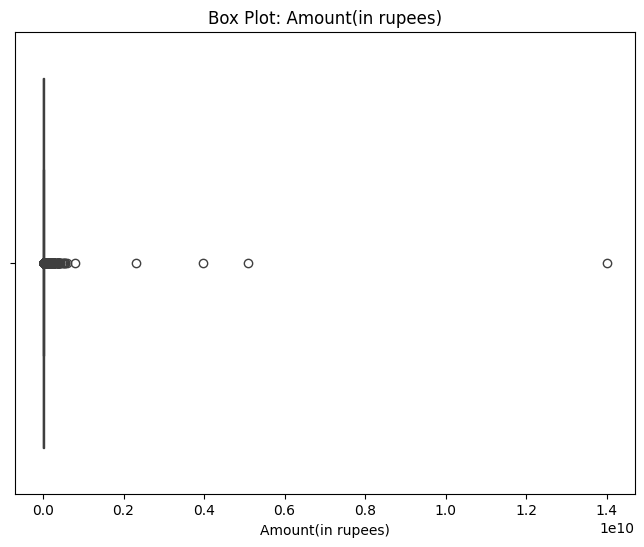

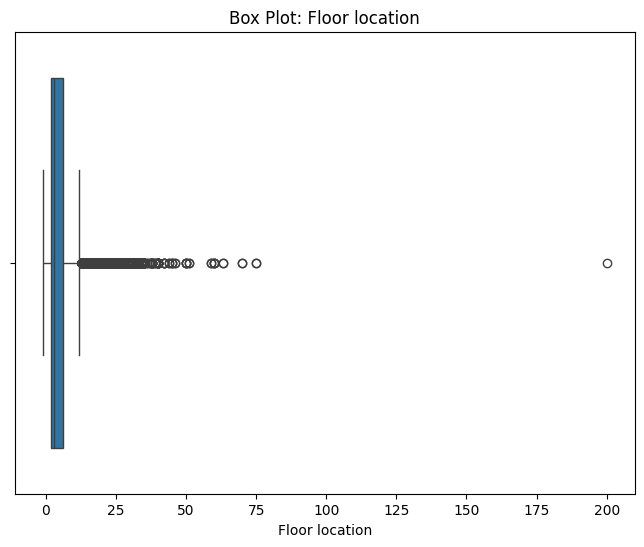

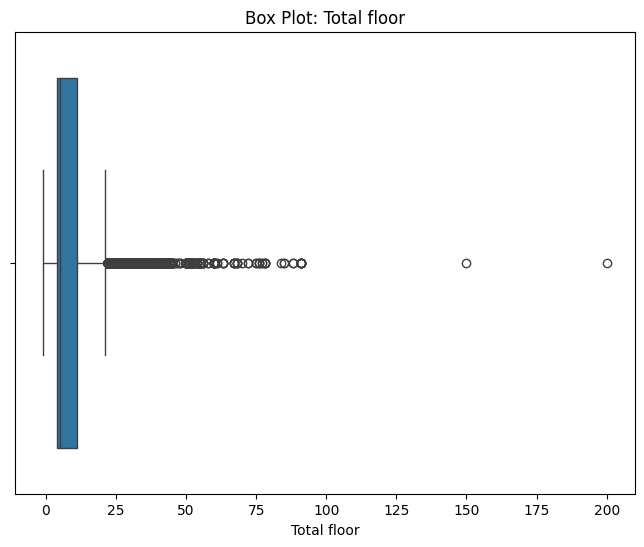

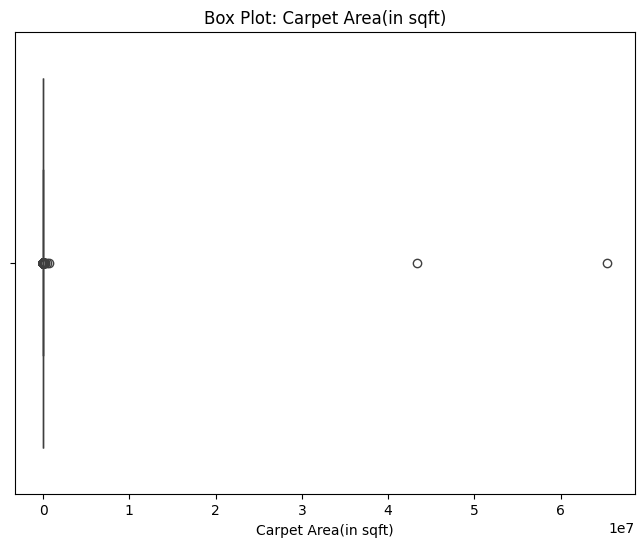

In [58]:
for col in num_cols:
    if col not in ['overlooking_Not Available', 'overlooking_Main Road', 'overlooking_Garden/Park', 'overlooking_Pool']:
        box_plot(col, final_df)

<Axes: ylabel='Density'>

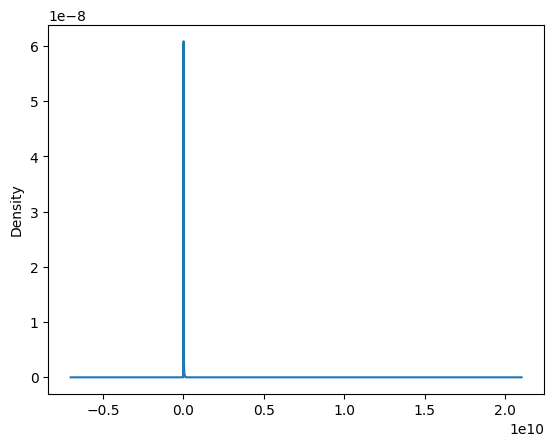

In [59]:
final_df[target].plot(kind='kde')

In [60]:
def IQR_outlier_detector(col, df, conf=1.5):
  Q3 = df[col].quantile(0.75)
  Q1 = df[col].quantile(0.25)
  IQR = Q3 - Q1

  lower_bound = Q1 - conf * IQR
  upper_bound = Q3 + conf * IQR

  lower_bound_rate = (df[col] < lower_bound).sum() / len(df)
  upper_bound_rate = (df[col] > upper_bound).sum() / len(df)
  print(col)
  print(f"Upper bound rate: {upper_bound_rate}")
  print(f"Lower bound rate: {lower_bound_rate}")
  print('\n')
  return (df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]).reset_index(inplace=False, drop=True)

# for col in cleaned_num_cols:
#   cleaned_df = IQR_clean_num_attr(col, cleaned_df)


In [61]:
def handle_numeric_outliers(cols, df):
  df_without_outliers = df.copy()
  for col in cols:
    df_without_outliers = IQR_outlier_detector(col, df_without_outliers)
  return df_without_outliers

final_df = handle_numeric_outliers([col for col in num_cols if col not in ['overlooking_Not Available', 'overlooking_Main Road', 'overlooking_Garden/Park', 'overlooking_Pool']], final_df)

Amount(in rupees)
Upper bound rate: 0.06549850424729778
Lower bound rate: 0.0


Floor location
Upper bound rate: 0.06496581382426131
Lower bound rate: 0.0


Total floor
Upper bound rate: 0.050800841287817505
Lower bound rate: 0.0


Carpet Area(in sqft)
Upper bound rate: 0.0089199477302426
Lower bound rate: 0.0




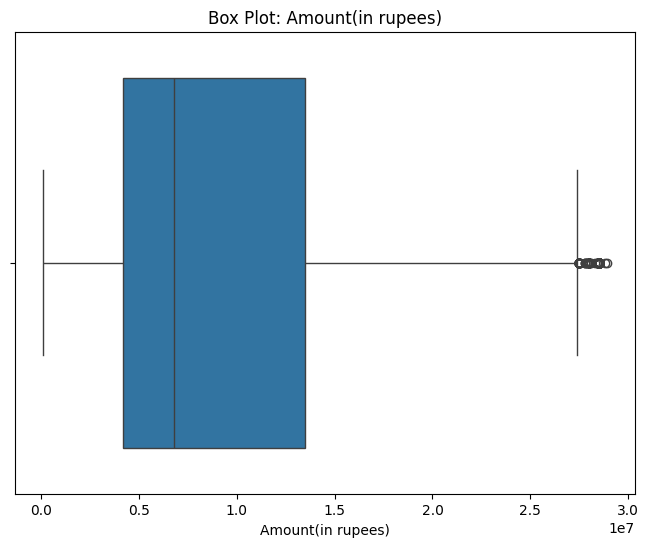

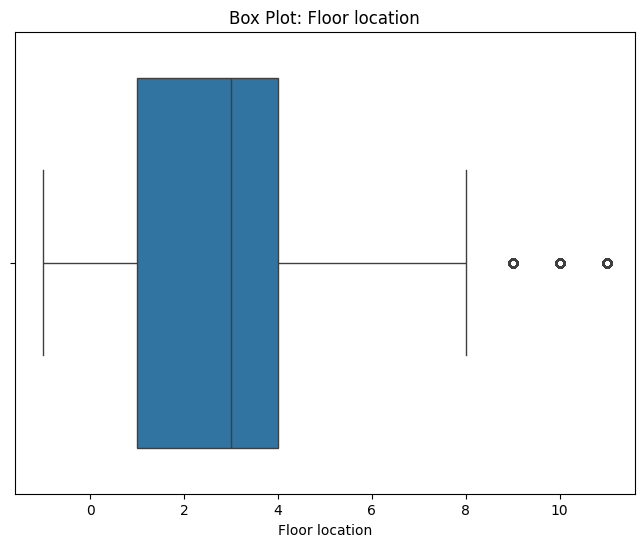

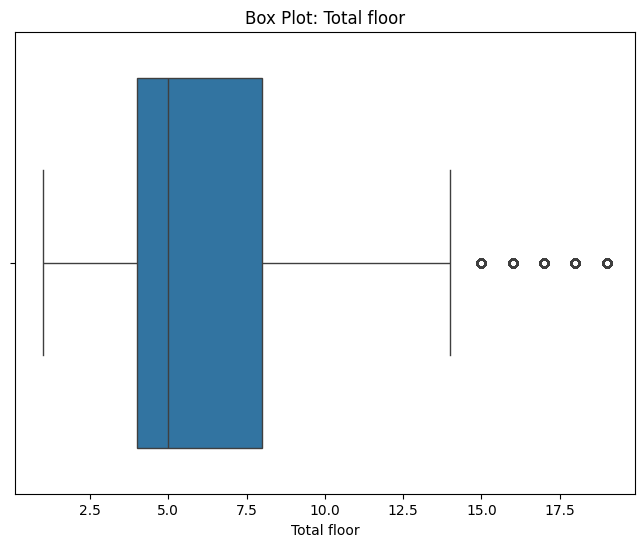

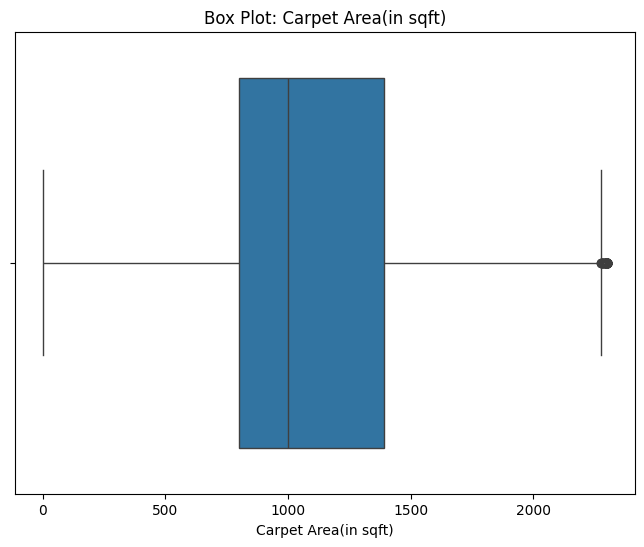

In [62]:
def viz_num_cols(cols, df):
  for col in cols:
    box_plot(col, df)
    # viz_numeric_features(col, df)

viz_num_cols([col for col in num_cols if col not in ['overlooking_Not Available', 'overlooking_Main Road', 'overlooking_Garden/Park', 'overlooking_Pool']], final_df.reset_index(drop=True, inplace=False))

<Axes: ylabel='Density'>

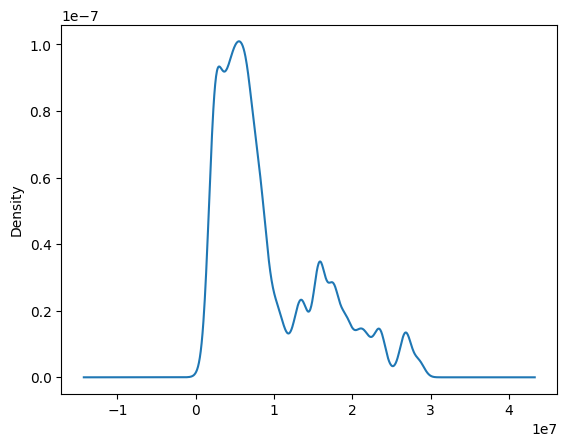

In [63]:
final_df[target].plot(kind='kde')

#**Handle missing values**

In [64]:
display(final_df.dtypes)

final_df['Bathroom'] = final_df['Bathroom'].astype('float64')
final_df['Balcony'] = final_df['Balcony'].astype('float64')
final_df['Bedroom, Hall and Kitchen'] = final_df['Bedroom, Hall and Kitchen'].astype('float64')

cols, cat_cols, num_cols = get_col_details(final_df)
missing_numeric_cols = np.intersect1d(num_cols, missing_cols)
missing_categoric_cols = np.intersect1d(cat_cols, missing_cols)
print("Missing Numeric Columns : " , missing_numeric_cols)
print("Missing Categoric Columns : " , missing_categoric_cols)

Amount(in rupees)            float64
location                      object
Transaction                   object
Furnishing                    object
facing                        object
Bathroom                      object
Balcony                       object
Ownership                     object
Bedroom, Hall and Kitchen     object
Floor location               float64
Total floor                  float64
Carpet Area(in sqft)         float64
overlooking_Not Available    float64
overlooking_Main Road        float64
overlooking_Garden/Park      float64
overlooking_Pool             float64
dtype: object

Missing Numeric Columns :  ['Amount(in rupees)' 'Balcony' 'Bathroom' 'Bedroom, Hall and Kitchen'
 'Carpet Area(in sqft)' 'Floor location' 'Total floor']
Missing Categoric Columns :  ['Furnishing' 'Ownership' 'Transaction' 'facing']


In [65]:
# Approach 01 : Remove any rows with missing values
# Approach 02 : Impute missing values with Descriptive Statistics (Mean/Median/Mode)
# Approach 03 : Impute missing values by finding correlation groups

In [66]:
without_missings_df = {}

## Approach 01 : Remove any rows with missing values

In [67]:
def listwise_deletion(df):
  for col in df.columns:
    miss_ind = df[col][df[col].isnull()].index
    df = df.drop(miss_ind, axis = 0)
  return df.reset_index(drop=True, inplace=False)

without_missings_df['app01'] = listwise_deletion(final_df.copy())

## Approach 02: Impute missing values with Descriptive Statistics (Mean/Median/Mode)

In [68]:
def mean_imputation(data, missing_numeric_cols):
  for col in missing_numeric_cols:
    data[col] = data[col].fillna(data[col].mean())
  return data

def median_imputation(data, missing_numeric_cols):
  for col in missing_numeric_cols:
    data[col] = data[col].fillna(data[col].median())
  return data

def mode_imputation(data, missing_categoric_cols):
  for col in missing_categoric_cols:
    data[col] = data[col].fillna(data[col].mode().iloc[0])
  return data

def impute_with_ds(df):
  cols, cat_cols, num_cols = get_col_details(df)
  df = median_imputation(df, num_cols)
  df = mode_imputation(df, cat_cols)
  return df.reset_index(drop=True, inplace=False)

without_missings_df['app02'] = impute_with_ds(final_df.copy())

## Approach 03: Impute missing values by finding correlation groups

In [69]:
!pip install association-metrics

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [70]:
import association_metrics as am

am_df = final_df[cat_cols].copy()
am_df = am_df.apply(lambda x : x.astype("category") if x.dtype =="object" else x)

In [71]:
cramersv = am.CramersV(am_df)
categoric_corr_matrix = cramersv.fit()
display(categoric_corr_matrix)

,location,Transaction,Furnishing,facing,Ownership
location,1.000000,0.250609,0.294032,0.336555,0.436860
Transaction,0.250609,1.000000,0.173974,0.111185,0.084853
Furnishing,0.294032,0.173974,1.000000,0.322485,0.073074
facing,0.336555,0.111185,0.322485,1.000000,0.125222
Ownership,0.436860,0.084853,0.073074,0.125222,1.000000


In [72]:
def group_categoric_imputation(data, categoric_corr_matrix, missing_categoric_cols):
  group_dict = {}
  for col in missing_categoric_cols:
    corr_col = categoric_corr_matrix[col].sort_values(ascending = False).keys()[1]
    rowIdx_notnull = data[corr_col].notnull()
    rowIdx_null = data[col].isnull()
    TargetDict = {val : data[data[corr_col] == val][col].mode().iloc[0] for val in data.loc[rowIdx_notnull, corr_col].unique()}
    group_dict[col] = {corr_col : TargetDict}
    data["map_value"] = data[corr_col].map(TargetDict)
    data.loc[rowIdx_null, col] = data.loc[rowIdx_null, "map_value"]

    rowIdx_null_all = data[col].isnull() & data[corr_col].isnull()
    data.loc[rowIdx_null_all, col] = data.loc[rowIdx_null_all, col].fillna(data[col].mode().iloc[0])
  return data, group_dict

In [73]:
def impute_by_finding_correlation_groups(data, categoric_corr_matrix, missing_categoric_cols, missing_numeric_cols):
  data_categoric_imp_group, group_dict = group_categoric_imputation(data, categoric_corr_matrix, missing_categoric_cols)
  data_imp_group = median_imputation(data_categoric_imp_group, missing_numeric_cols)
  return data_imp_group.drop('map_value', axis=1, inplace=False).reset_index(drop=True, inplace=False)

without_missings_df['app03'] = impute_by_finding_correlation_groups(final_df.copy(), categoric_corr_matrix, missing_categoric_cols, missing_numeric_cols)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

data_list = {}

for app, df in without_missings_df.items():
  X = df[[col for col in df.columns if col != target]]
  X_cols, X_cat_cols, X_num_cols = get_col_details(X)
  X_ohe = pd.get_dummies(X[X_cat_cols], drop_first=True).join(X[X_num_cols])
  y = df[[target]]
  print(app)
  print(f'X shape: {X.shape}')
  print(f'y shape: {y.shape}\n')

  data_list[app] = {'total': {'features': X, 'target': y, 'ohe_features': X_ohe}, 'train': {}, 'test': {}}

app01
X shape: (55858, 15)
y shape: (55858, 1)

app02
X shape: (78235, 15)
y shape: (78235, 1)

app03
X shape: (78235, 15)
y shape: (78235, 1)



In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

for app, data in data_list.items():
  X_train, X_test, y_train, y_test = train_test_split(data['total']['ohe_features'], data['total']['target'], test_size=0.25, random_state=42)
  data_list[app]['train']['features'] = X_train
  data_list[app]['test']['features'] = X_test
  data_list[app]['train']['target'] = y_train
  data_list[app]['test']['target'] = y_test

#**Feature Selection**

In [76]:
!pip install skfeature-chappers

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df_encoded = final_df.copy().dropna()
for col in cat_cols:
  final_df_encoded[col] = le.fit_transform(final_df_encoded[col])
corr = final_df_encoded.corr()
corr.style.background_gradient(cmap='coolwarm')

,Amount(in rupees),location,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,"Bedroom, Hall and Kitchen",Floor location,Total floor,Carpet Area(in sqft),overlooking_Not Available,overlooking_Main Road,overlooking_Garden/Park,overlooking_Pool
Amount(in rupees),1.000000,0.119728,0.081617,-0.020557,-0.053114,0.605724,0.560045,0.062648,0.636655,0.333852,0.274045,0.752279,-0.005761,0.205530,0.414229,0.031877
location,0.119728,1.000000,0.071116,-0.063400,0.009583,-0.053877,0.162013,-0.102105,0.053870,-0.024618,-0.067050,0.056723,0.006591,0.092767,0.102474,-0.190235
Transaction,0.081617,0.071116,1.000000,-0.069602,0.162322,-0.134342,0.142806,-0.077028,-0.068972,0.232810,0.087565,0.032657,0.005477,-0.046708,0.034714,-0.026638
Furnishing,-0.020557,-0.063400,-0.069602,1.000000,-0.035887,-0.099617,-0.096166,-0.033287,-0.086424,0.028942,0.057306,-0.070383,0.006558,-0.045114,-0.067398,0.013512
facing,-0.053114,0.009583,0.162322,-0.035887,1.000000,-0.003277,-0.045289,0.037438,0.006751,0.092705,-0.128017,-0.023941,0.000843,-0.051810,-0.107100,0.059262
Bathroom,0.605724,-0.053877,-0.134342,-0.099617,-0.003277,1.000000,0.444611,0.095416,0.741649,0.268693,0.272061,0.752897,0.003436,0.172723,0.272414,0.198532
Balcony,0.560045,0.162013,0.142806,-0.096166,-0.045289,0.444611,1.000000,0.070126,0.510552,0.321390,0.309313,0.569593,0.003910,0.181537,0.330263,0.026703
Ownership,0.062648,-0.102105,-0.077028,-0.033287,0.037438,0.095416,0.070126,1.000000,0.072010,0.049232,0.124568,0.076347,0.005628,0.068948,0.059976,0.263234
"Bedroom, Hall and Kitchen",0.636655,0.053870,-0.068972,-0.086424,0.006751,0.741649,0.510552,0.072010,1.000000,0.286962,0.231700,0.792498,0.004166,0.112953,0.274691,0.104701
Floor location,0.333852,-0.024618,0.232810,0.028942,0.092705,0.268693,0.321390,0.049232,0.286962,1.000000,0.694709,0.293464,-0.001859,0.052549,0.368050,0.225249


In [78]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(final_df_encoded[[col for col in final_df_encoded.columns if col != target]], final_df_encoded[target])

RandomForestRegressor(random_state=42)

In [79]:
feature_names = [col for col in final_df_encoded.columns if col != target]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
print("Feature Names:", feature_names)
print("Std: ", std)
print("Importance: ", importances)

Feature Names: ['location', 'Transaction', 'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Ownership', 'Bedroom, Hall and Kitchen', 'Floor location', 'Total floor', 'Carpet Area(in sqft)', 'overlooking_Not Available', 'overlooking_Main Road', 'overlooking_Garden/Park', 'overlooking_Pool']
Std:  [1.13608049e-02 1.64428275e-03 1.15107368e-03 1.74603403e-03
 6.22037811e-03 1.62308309e-02 5.47053762e-04 2.44340439e-02
 3.71142236e-02 1.61078980e-02 1.42034343e-02 6.67758051e-05
 6.12366072e-04 3.06898510e-03 3.34379981e-04]
Importance:  [1.01717998e-01 1.13971168e-02 6.23863257e-03 8.73382899e-03
 1.67511304e-02 5.44798048e-02 3.05719150e-03 2.69807002e-02
 4.83320512e-02 9.02224662e-02 6.14542751e-01 1.05286592e-05
 5.16511672e-03 1.05606198e-02 1.81006300e-03]


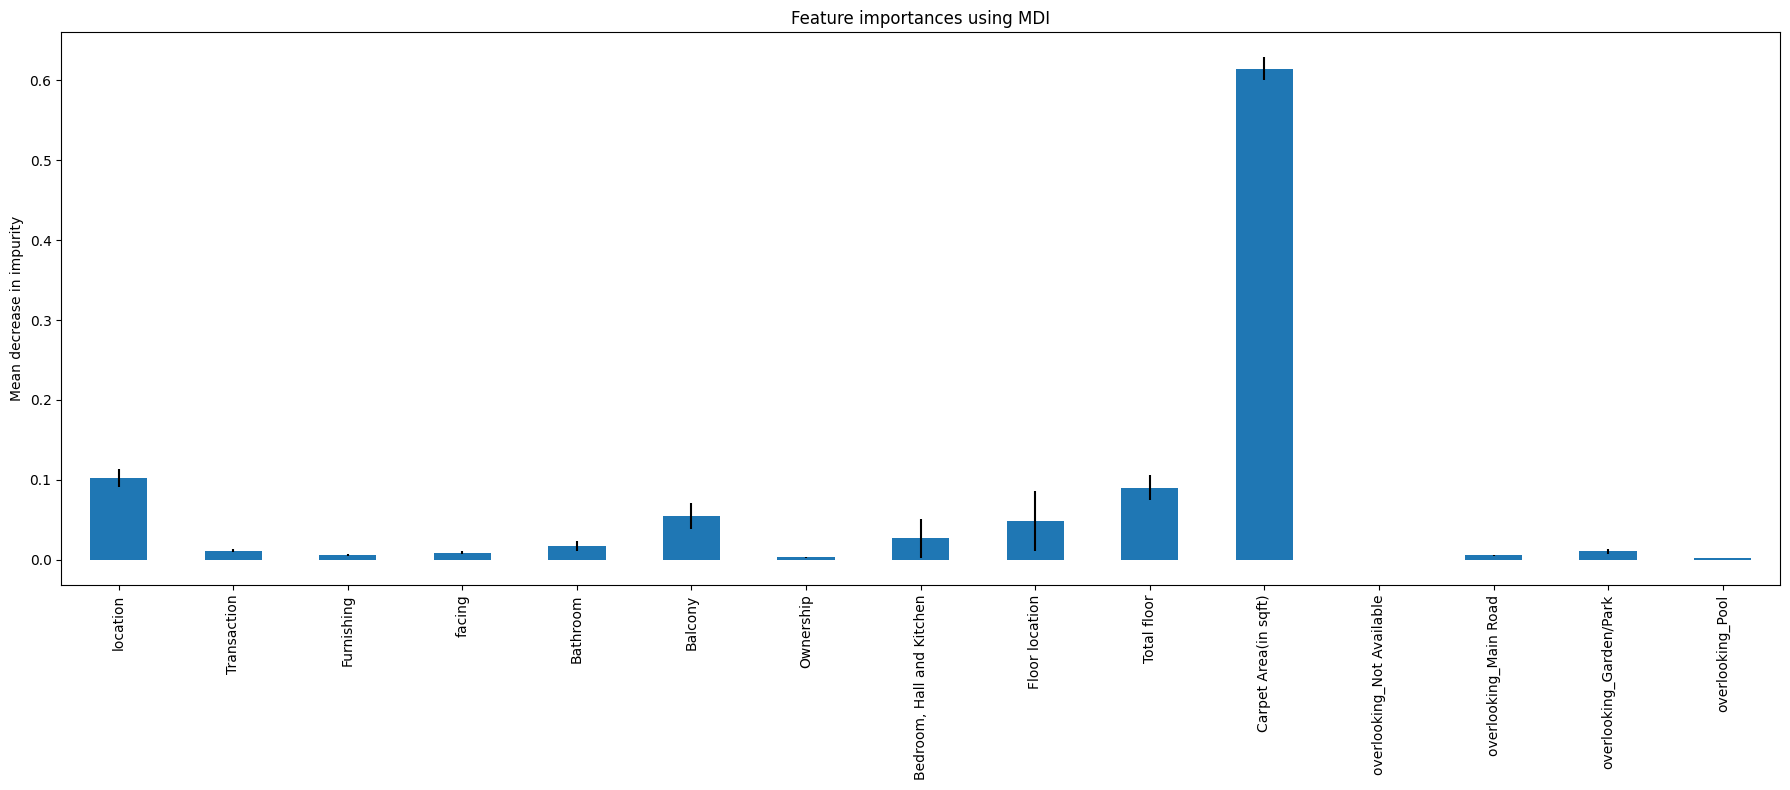

In [80]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(18, 8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#**Building Pipelines & Params Searching**

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': xgboost.XGBRegressor(objective= "reg:squarederror", random_state=42),
    'KNeighbor Regressor': KNeighborsRegressor(),
    'GradientBoosting Regressor': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso()
}

param_grid = {
    'Random Forest Regressor': {
      'regressor__n_estimators': [50, 100, 200],
      'regressor__max_depth': [None, 10, 20],
  },
    'XGBoost Regressor': {
        "regressor__learning_rate": (0.05, 0.10, 0.15),
        "regressor__max_depth": [ 3, 4, 5, 6, 8],
        "regressor__min_child_weight": [ 1, 3, 5, 7],
        "regressor__gamma":[ 0.0, 0.1, 0.2],
        "regressor__colsample_bytree":[ 0.3, 0.4],
        },
    'KNeighbor Regressor': {
        'regressor__n_neighbors': [5, 10, 15, 20, 25, 30]
      },
    'GradientBoosting Regressor': {
        'regressor__max_depth': [80, 90, 100, 110],
        'regressor__max_features': [2, 3],
        'regressor__min_samples_leaf': [3, 4, 5],
        'regressor__min_samples_split': [8, 10, 12],
        'regressor__n_estimators': [50, 100, 200]
    },
    'Linear Regression': {}, 
    'StandardScaler': {
        'with_mean': [True, False],
        'with_std': [True, False]
    },
    'Lasso Regression': {
        'regressor__alpha': [0.001, 0.01, 0.1, 1.0],  
        'regressor__max_iter': [1000, 10000]
    }
}
grid_search = {}
for name, model in models.items():
  pipeline = Pipeline([
      ('scale', StandardScaler()),
    ('regressor', model)
  ])
  grid_search[name] = GridSearchCV(pipeline, param_grid[name], scoring='neg_mean_squared_error', cv=3, error_score='raise')


In [83]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

if not os.path.exists('models'):
    os.makedirs('models')
approach = 'app02'
data = data_list[approach]

for name in models.keys():
    X_train, y_train = data['train']['features'], data['train']['target']
    
    grid_search[name].fit(X_train, y_train)

    filename = f'models/{name}_model.pkl'
    joblib.dump(grid_search[name], filename, compress=1)

#**Eval models && Find best processed data**

In [84]:
def preds_actuals_comparison_plot(actual, pred, model_name):
  plt.scatter(actual, pred, color='blue', label='Actual vs Predicted')
  plt.plot(actual, actual, color='red')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title(f'Actual vs Predicted Values ({model_name})')
  plt.legend()
  plt.show()

## Find best data processing approach

In [85]:
for app, data in data_list.items():
    print('\nApproach:', app)
    X_test, y_test = data['test']['features'], data['test']['target']
    X_train, y_train = data['train']['features'], data['train']['target']
    
    for model_name in models.keys():
        filename = f'models/{model_name}_model.pkl'
        raw_model = models[model_name]
        best_params = joblib.load(filename).best_params_
        best_params = {key.replace('regressor__', ''): value for key, value in best_params.items()}
        raw_model.set_params(**best_params)
        raw_model.fit(X_train, y_train)
        y_pred = raw_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(model_name, f'r2: {r2}', f'| mae: {mae}')


Approach: app01
Random Forest Regressor r2: 0.941167142287433 | mae: 653374.0768052804
XGBoost Regressor r2: 0.9405318040983417 | mae: 744856.3581610275
KNeighbor Regressor r2: 0.8678733450979909 | mae: 1046280.8449695668
GradientBoosting Regressor r2: 0.9427662951077183 | mae: 671241.1270995762
Linear Regression r2: 0.7999688936404242 | mae: 2294845.080345503
Lasso Regression r2: 0.7999652285961227 | mae: 2294817.50860704

Approach: app02
Random Forest Regressor r2: 0.9445501108744279 | mae: 620430.9731327891
XGBoost Regressor r2: 0.9399948204616393 | mae: 752070.3600867887
KNeighbor Regressor r2: 0.8722605421986268 | mae: 998244.1842629991
GradientBoosting Regressor r2: 0.9464771564792265 | mae: 628192.7523337228
Linear Regression r2: 0.7777263076375348 | mae: 2312163.9688207153
Lasso Regression r2: 0.7777264429973091 | mae: 2312145.1349528553

Approach: app03
Random Forest Regressor r2: 0.9441442270564354 | mae: 620946.8440945812
XGBoost Regressor r2: 0.940336848230863 | mae: 74741

Random Forest Regressor:


Pipeline(steps=[('scale', StandardScaler()),
                ('regressor', RandomForestRegressor(n_estimators=200))])

R-squared: 0.94
Mean Absolute Error (MAE): 620608.62
Root Mean Squared Error (RMSE): 1581404.82
Accuracy of Model:0.94


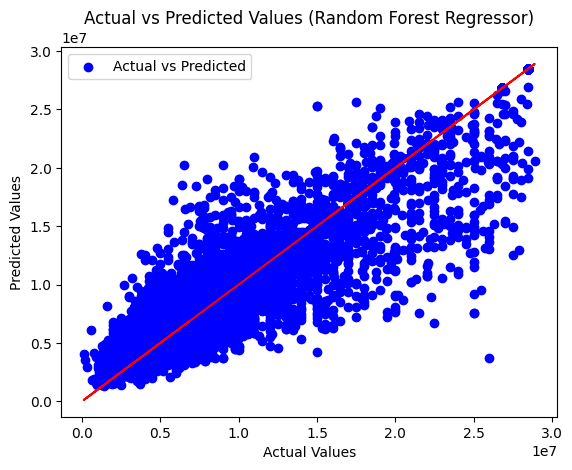

****************************************
XGBoost Regressor:


Pipeline(steps=[('scale', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.4, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0.0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.15,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None, min_child_weight=1,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=None,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

R-squared: 0.94
Mean Absolute Error (MAE): 752070.36
Root Mean Squared Error (RMSE): 1643808.42
Accuracy of Model:0.94


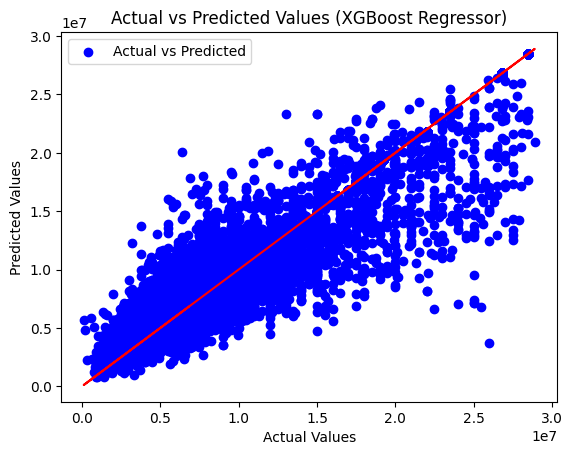

****************************************
KNeighbor Regressor:


Pipeline(steps=[('scale', StandardScaler()),
                ('regressor', KNeighborsRegressor())])

R-squared: 0.92
Mean Absolute Error (MAE): 785336.78
Root Mean Squared Error (RMSE): 1955964.14
Accuracy of Model:0.92


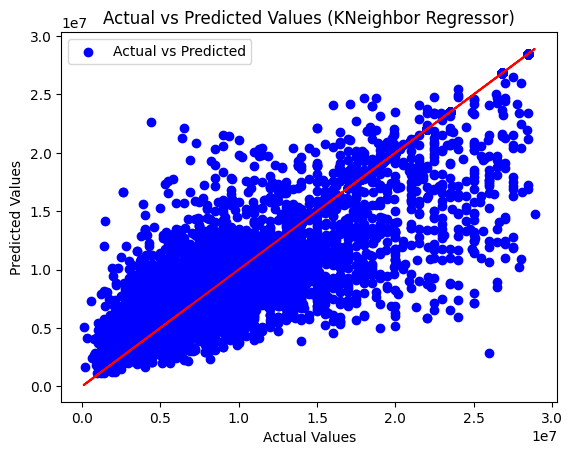

****************************************
GradientBoosting Regressor:


Pipeline(steps=[('scale', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=80, max_features=3,
                                           min_samples_leaf=3,
                                           min_samples_split=10,
                                           n_estimators=200))])

R-squared: 0.95
Mean Absolute Error (MAE): 626927.19
Root Mean Squared Error (RMSE): 1555986.96
Accuracy of Model:0.95


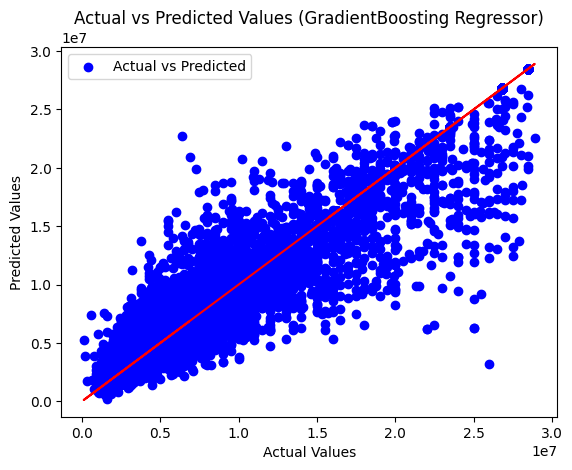

****************************************
Linear Regression:


Pipeline(steps=[('scale', StandardScaler()), ('regressor', LinearRegression())])

R-squared: 0.78
Mean Absolute Error (MAE): 2312163.97
Root Mean Squared Error (RMSE): 3163740.56
Accuracy of Model:0.78


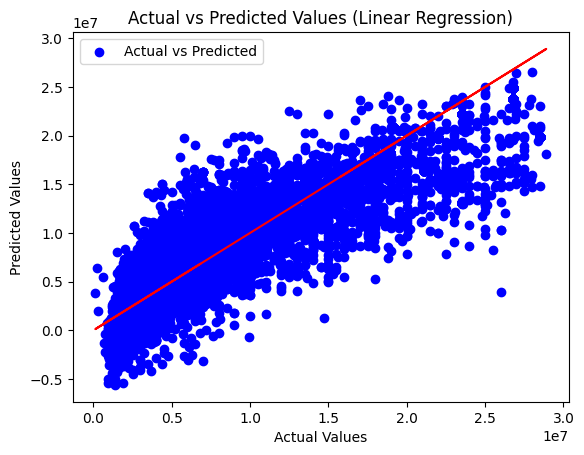

****************************************
Lasso Regression:


Pipeline(steps=[('scale', StandardScaler()), ('regressor', Lasso())])

R-squared: 0.78
Mean Absolute Error (MAE): 2312156.88
Root Mean Squared Error (RMSE): 3163740.83
Accuracy of Model:0.78


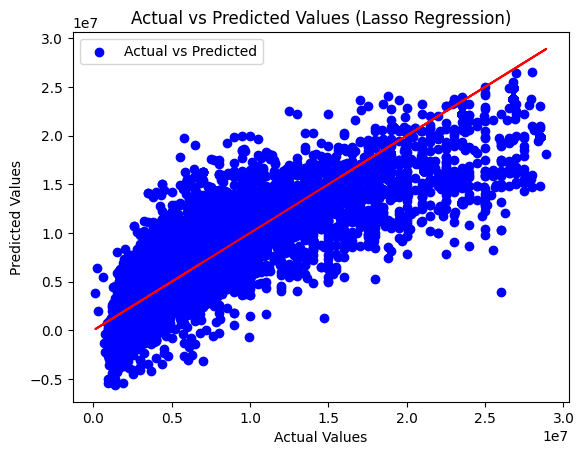

****************************************


In [86]:
eval = {}
for name in models.keys():
    filename = f'models/{name}_model.pkl'
    gs = joblib.load(filename)
    try:
        model = gs.best_estimator_
        X_test, y_test = data_list['app02']['test']['features'], data_list['app02']['test']['target']
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        score = model.score(X_test,y_test)
    
        eval[name] = {
            'r2': r2,
            'mae': mae,
            'rmse': rmse,
            'score': score
        }
        
        print(f'{name}:')
        display(model)
        print(f'R-squared: {r2:.2f}')
        print(f'Mean Absolute Error (MAE): {mae:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'Accuracy of Model:{score:.2f}')
        preds_actuals_comparison_plot(y_test.values, y_pred, name)
        print('****************************************')
    except Exception as e:
        print(e)


In [87]:
best_approach = 'app03'
best_processed_data = data_list[best_approach]['total']

# **Models training for Demo Application**

In [88]:
import pickle

X, y = best_processed_data['ohe_features'], best_processed_data['target']

for name, model in models.items():
    gs_filename = f'models/{name}_model.pkl' 
    best_params = joblib.load(gs_filename).best_params_
    best_params = {key.replace('regressor__', ''): value for key, value in best_params.items()}
    model.set_params(**best_params)
    print('\nTraining model:', name)
    print('Best params:', best_params)
    model.fit(X, y)
    filename = f'models/{name}_fmodel.sav' 
    pickle.dump(model, open(filename, 'wb'))
    print(f'Model {name} saved')


Training model: Random Forest Regressor
Best params: {'max_depth': None, 'n_estimators': 200}
Model Random Forest Regressor saved

Training model: XGBoost Regressor
Best params: {'colsample_bytree': 0.4, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 1}
Model XGBoost Regressor saved

Training model: KNeighbor Regressor
Best params: {'n_neighbors': 5}
Model KNeighbor Regressor saved

Training model: GradientBoosting Regressor
Best params: {'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
Model GradientBoosting Regressor saved

Training model: Linear Regression
Best params: {}
Model Linear Regression saved

Training model: Lasso Regression
Best params: {'alpha': 1.0, 'max_iter': 1000}
Model Lasso Regression saved
